Index(['date', 'CPIAUCSL'], dtype='object')
         date  CPIAUCSL
0  1947-01-01     21.48
1  1947-02-01     21.62
2  1947-03-01     22.00
3  1947-04-01     22.00
4  1947-05-01     21.95


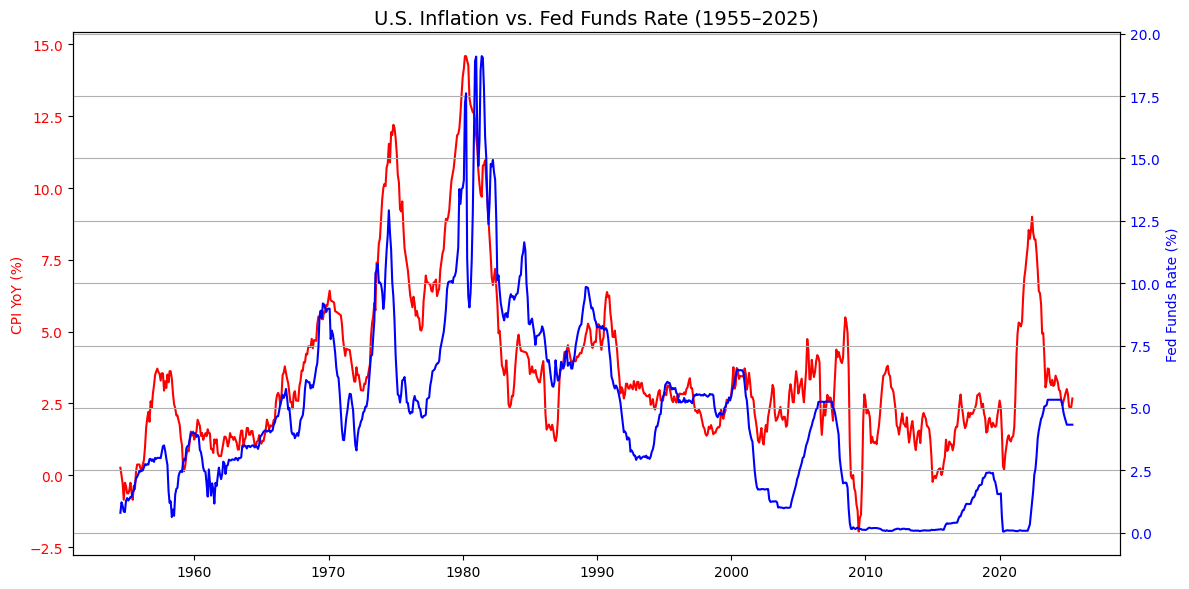

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_cpi = pd.read_csv("CPIAUCSL.csv")
print(df_cpi.columns)
print(df_cpi.head())

# Load from your local CSV downloads
df_cpi = pd.read_csv("CPIAUCSL.csv", parse_dates=['date'], index_col='date')
df_fed = pd.read_csv("FEDFUNDS.csv", parse_dates=['date'], index_col='date')

# Calculate YoY % change in CPI
df_cpi['CPI YoY (%)'] = df_cpi['CPIAUCSL'].pct_change(periods=12) * 100

# Merge CPI and Fed Rate
df = df_cpi[['CPI YoY (%)']].join(df_fed[['FEDFUNDS']], how='inner')
df.rename(columns={'FEDFUNDS': 'Fed Funds Rate'}, inplace=True)
df.dropna(inplace=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df.index, df['CPI YoY (%)'], color='red', label='CPI YoY (%)')
ax1.set_ylabel('CPI YoY (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(df.index, df['Fed Funds Rate'], color='blue', label='Fed Funds Rate (%)')
ax2.set_ylabel('Fed Funds Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('U.S. Inflation vs. Fed Funds Rate (1955–2025)', fontsize=14)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
fig.tight_layout()
plt.show()